# Feature Analysis

In [1]:
import pandas as pd
import math

In [2]:
filenames1 = ['pionminus','pionminus1','pionminus2','pionminus3','pionminus4','pionminus5']
filenames1 = ['ccbar0','ccbar0']
filenames1 = ['ccbar_new00','bbbar_new00','electron_hits0','positron_hits0']#,'ccbar_new00'
filenames1 = ['ccbar_hits0','bbbar_hits0','electron_hits0','positron_hits0']#,'ccbar_new00'
filepath = "/home/yoren/bnl/PHENIX/ee/ML/"

hadron_weight = 1#25000*50/500

In [ ]:
if True:
    data = pd.read_csv(filepath+f'{filenames1[0]}.csv')
    for ifile in range(1,len(filenames1)):
        idata = pd.read_csv(filepath+f'{filenames1[ifile]}.csv')
        data = pd.concat([data,idata], sort=False)

    #data = data.sample(frac = 1)
    float_columns=('Pt', 'Phi0', 'The0', 'PhiDC', 'ZDC', 'Alpha', 'Ecore',\
                   'reconpt','reconphi0','reconthe0','px','py','pz','vx','vy','vz',\
                   'sdphi0','sdthe0','SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR01','SecondHitPhiL01','SecondHitTheR01','SecondHitTheL01',\
                   'sdphi1','sdthe1','SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1','SecondHitPhiR11','SecondHitPhiL11','SecondHitTheR11','SecondHitTheL11',\
                   'sdphi2','sdthe2','SecondHitPhiR2','SecondHitPhiL2','SecondHitTheR2','SecondHitTheL2','SecondHitPhiR21','SecondHitPhiL21','SecondHitTheR21','SecondHitTheL21',\
                   'sdphi3','sdthe3','SecondHitPhiR3','SecondHitPhiL3','SecondHitTheR3','SecondHitTheL3','SecondHitPhiR31','SecondHitPhiL31','SecondHitTheR31','SecondHitTheL31')
    int_columns=('NBDThit','Centrality', 'Charge', 'Arm','IsTrue0','IsTrue1','IsTrue2','IsTrue3')
    
    for float_column in float_columns:
        data[float_column] = data[float_column].astype('float32')
    for int_column in int_columns:
        data[int_column] = data[int_column].astype('int32')
    data.head()
    
    data = data[(data['Pt'] > 0.4) & (data['Pt'] < 4.4) & (data['Ecore'] > 0.1) & (data['Ecore'] < 25) & (data['reconthe0'] < 25) & (data['reconthe0'] > -25) ]
    
    data.loc[data['sdphi2'] < -9, 'IsTrue3'] = 1
    data.loc[data['sdphi3'] < -9, 'IsTrue3'] = 1
    data['IsTrue0'] = data['IsTrue0']*data['IsTrue1'] * data['IsTrue2']*data['IsTrue3']
    data.loc[data['IsTrue0'] > 0, 'IsTrue0'] = 1


    #data['The0'] = data['The0'].apply(lambda x: math.sqrt( (float) ( 1.+1./math.tan(x)/math.tan(x) ) )) 
    #data['Ecore'] = (data['Ecore']*data['The0']-data['reconpt']) / data['Ecore'] / data['The0']# to be fixed
    data['reconpt'] = (data['Pt']-data['reconpt'])/data['Pt']
    #data['The0'] = data['The0'].apply(lambda x: math.sqrt( (float) ( 1.+1./math.tan(x)/math.tan(x) ) )) 
    #data['Ecore'] = data['Ecore']*data['The0']
    #data['Ecore1'] = data['Ecore']-data['reconpt']
    #data['Ecore2'] = data['Ecore1']/data['Ecore']
    #data['Ecore3'] = data['Ecore2']/data['Ecore']
    #data['reconpt1'] = data['Pt']-data['reconpt']
    #data['reconpt2'] = data['reconpt1']/data['Pt']
    #data['reconpt3'] = data['reconpt2']/data['Pt']
    #data['Alpha'] = data['Alpha']*data['Pt']
    #data['reconphi0'] = (data['reconphi0'] - data['Phi0'])*data['Charge']
    #data['sdphi2'] = data['sdphi2'] + 10
    #data['sdphi3'] = data['sdphi3'] + 10
    #data.loc[(data['sdthe3'] > -9) & (data['sdthe2'] > -9), 'sdthe3'] = 1
    #data.loc[data['sdthe3'] != 1, 'sdthe3'] = 0


    data['px'] = data['px'] * data['px'] 
    data['py'] = data['py'] * data['py'] 
    data['px'] = data['px'] + data['py']
    data['px'] = data['px']**0.5

In [ ]:
data.head()

NBDThit        Pt      Phi0      The0     PhiDC        ZDC     Alpha  \
0        1  0.703862  0.826042  1.808594  0.524902 -52.657902  0.153076   
1        1  0.877127  2.605383  1.646484  2.373047 -16.800316  0.114990   
2        1  0.685948  0.004440  1.630859 -0.292236 -13.165155  0.147583   
3        1  0.859024  2.107402  1.397461  2.345703  38.445175 -0.121704   
4        3  0.503556  3.038382  1.877930  2.609375 -68.445808  0.220825   

      Ecore  Centrality  Charge  ...     sdthe3  IsTrue3  SecondHitPhiR3  \
0  0.745502          83      -1  ...  -0.652769        1           -99.0   
1  0.939676          89      -1  ...   1.334269        1           -99.0   
2  0.582862          89      -1  ...   0.475495        1           -99.0   
3  0.875231          58       1  ...  -0.364673        1           -99.0   
4  0.429717          80      -1  ... -10.000000        1           -99.0   

   SecondHitPhiL3  SecondHitTheR3  SecondHitTheL3  SecondHitPhiR31  \
0           -99.0           -99.0           -99.0            -99.0   
1           -99.0           -99.0           -99.0            -99.0   
2           -99.0           -99.0           -99.0            -99.0   
3           -99.0           -99.0           -99.0            -99.0   
4           -99.0           -99.0           -99.0            -99.0   

   SecondHitPhiL31  SecondHitTheR31  SecondHitTheL31  
0            -99.0            -99.0            -99.0  
1            -99.0            -99.0            -99.0  
2            -99.0            -99.0            -99.0  
3            -99.0            -99.0            -99.0  
4            -99.0            -99.0            -99.0  

[5 rows x 64 columns]

In [ ]:
print(data.size, data.shape)

692737472 (10824023, 64)


In [ ]:
# удалим лишние колонки
data = data.drop(columns = ['IsTrue1','IsTrue2','IsTrue3','py','pz','vx','vy','vz','reconthe0','Phi0', 'The0', 'PhiDC', 'ZDC'])
data = data.drop(columns=  ['SecondHitPhiL0','SecondHitTheL0','SecondHitPhiL01','SecondHitTheL01'])
data = data.drop(columns=  ['SecondHitPhiL1','SecondHitTheL1','SecondHitPhiL11','SecondHitTheL11'])
data = data.drop(columns=  ['SecondHitPhiL2','SecondHitTheL2','SecondHitPhiL21','SecondHitTheL21'])
data = data.drop(columns=  ['SecondHitPhiL3','SecondHitTheL3','SecondHitPhiL31','SecondHitTheL31'])
data = data.drop(columns=  ['NBDThit','reconphi0','Alpha','Charge', 'Arm'])

#data = data.drop(columns = ['sdphi0','sdphi1','sdphi2','sdphi3'])
#data = data.drop(columns = ['sdthe0','sdthe1','sdthe2'])

#data = data.drop(columns=  ['SecondHitPhiR0','SecondHitTheR0','SecondHitPhiR01','SecondHitTheR01'])
#data = data.drop(columns=  ['SecondHitPhiR1','SecondHitTheR1','SecondHitPhiR11','SecondHitTheR11'])
#data = data.drop(columns=  ['SecondHitPhiR2','SecondHitTheR2','SecondHitPhiR21','SecondHitTheR21'])
#data = data.drop(columns=  ['SecondHitPhiR3','SecondHitTheR3','SecondHitPhiR31','SecondHitTheR31'])

In [ ]:
data.head()

Pt     Ecore  Centrality   reconpt        px    sdphi0    sdthe0  \
0  0.703862  0.745502          83  0.038117  0.748374 -0.408232 -0.003568   
1  0.877127  0.939676          89 -0.100278  0.871650  2.162194  0.236269   
2  0.685948  0.582862          89 -0.115648  0.757490 -1.210860  0.185756   
3  0.859024  0.875231          58 -0.158040  0.875596  0.047699 -0.068520   
4  0.503556  0.429717          80 -0.274017  0.514479 -0.028907 -0.798073   

   IsTrue0  SecondHitPhiR0  SecondHitTheR0  ...  SecondHitPhiR2  \
0        1           -99.0           -99.0  ...           -99.0   
1        1           -99.0           -99.0  ...           -99.0   
2        1           -99.0           -99.0  ...           -99.0   
3        1           -99.0           -99.0  ...           -99.0   
4        1           -99.0           -99.0  ...           -99.0   

   SecondHitTheR2  SecondHitPhiR21  SecondHitTheR21     sdphi3     sdthe3  \
0           -99.0            -99.0            -99.0  -0.723015  -0.652769   
1           -99.0            -99.0            -99.0  -0.415571   1.334269   
2           -99.0            -99.0            -99.0  -1.284242   0.475495   
3           -99.0            -99.0            -99.0  -0.858121  -0.364673   
4           -99.0            -99.0            -99.0 -10.000000 -10.000000   

   SecondHitPhiR3  SecondHitTheR3  SecondHitPhiR31  SecondHitTheR31  
0           -99.0           -99.0            -99.0            -99.0  
1           -99.0           -99.0            -99.0            -99.0  
2           -99.0           -99.0            -99.0            -99.0  
3           -99.0           -99.0            -99.0            -99.0  
4           -99.0           -99.0            -99.0            -99.0  

[5 rows x 30 columns]

In [ ]:
import matplotlib.pyplot as plt

def analysis(data: pd.DataFrame):
    fig, ax = plt.subplots(4, 3, figsize=(15, 6))
    for i, feature in enumerate(['IsTrue0', 'Pt', 'reconpt', 'Ecore1', 'Ecore2', 'Ecore3', 'reconpt1', 'reconpt2', 'reconpt3']):
        x, y = divmod(i, 3)
        data[feature].plot.hist(ax=ax[x][y], ylabel='', title=feature, color='skyblue', logy=True)


In [ ]:
#analysis(data)

+ Видим, что impressions имеют только одно значение, поэтому их можно удалить.
+ Таргет-переменная clicks сильно несбалансирована. Возможно, стоит использовать балансировку весов, а также в качестве оценки моделей использовать f1 и ROC AUC.
+ У campaign_clicks нулевых значений сильно больше, чем ненулевых, следовательно, можно трансформировать в бинарную фичу
+ os_id со значениями больше 6 встречается редко, можно объединить в одну категорию
+ Аналогично с редкими значениями zone_id

# Feature Engineering

In [ ]:
def feature_engineering(data: pd.DataFrame) -> pd.DataFrame:
    # делим выборку на train и test
    #data = data.sort_values(by='date_time', ignore_index=True)
    #cut_off_val = data[data['date_time'] < pd.to_datetime('2021-10-01')].index[-1]
    #cut_off_test = data[data['date_time'] < pd.to_datetime('2021-10-02')].index[-1]

    cut_off_val =  int (data.shape[0]/2)
    cut_off_test = int (data.shape[0]/8*7 + 1)

    print(cut_off_val,cut_off_test)
    all_test = data[cut_off_test:]
    y = data['IsTrue0']
    data = data.drop(columns = ['IsTrue0'])
    data = data.drop(columns = ['sdphi0','sdphi1','sdphi2','sdphi3'])
    data = data.drop(columns = ['Centrality','Pt','Ecore'])
    data = data.drop(columns = ['px'])
    data_train, data_test = data[:cut_off_test], data[cut_off_test:]
    y_train, y_test = y.iloc[:cut_off_test], y.iloc[cut_off_test:]
    
    # делаем one hot encodings
    #enc = OneHotEncoder(drop='first', handle_unknown='ignore')
    #enc.fit(data_train)
    #transformed_train = enc.transform(data_train)
    #transformed_test = enc.transform(data_test)
    
    return data_train, data_test, y_train, y_test, all_test

In [ ]:
X_train_all, X_test, y_train_all, y_test, all_test = feature_engineering(data)

5412011 9471021


In [ ]:
X_test

reconpt    sdthe0  SecondHitPhiR0  SecondHitTheR0  SecondHitPhiR01  \
988162  -0.320143 -0.558251       43.006527      -15.829206            -99.0   
988163  -0.320143 -0.558251       43.006527      -15.829206            -99.0   
988164  -0.463941 -0.558251       43.006527      -15.829206            -99.0   
988165  -0.042148 -0.070141      -99.000000      -99.000000            -99.0   
988166  -0.042148 -0.070141      -99.000000      -99.000000            -99.0   
...           ...       ...             ...             ...              ...   
2455160  0.063628  0.284871      -99.000000      -99.000000            -99.0   
2455161 -0.115348 -0.418102       35.135986       11.769594            -99.0   
2455162 -0.053423 -0.366738      -99.000000      -99.000000            -99.0   
2455163 -0.053423 -0.366738      -99.000000      -99.000000            -99.0   
2455164 -0.041547 -0.366738      -99.000000      -99.000000            -99.0   

         SecondHitTheR01    sdthe1  SecondHitPhiR1  SecondHitTheR1  \
988162             -99.0 -3.230871       26.812038      -12.175121   
988163             -99.0 -3.230871       26.812038      -12.175121   
988164             -99.0  0.473108       26.812038      -12.175121   
988165             -99.0 -1.159919      -99.000000      -99.000000   
988166             -99.0 -1.159919      -99.000000      -99.000000   
...                  ...       ...             ...             ...   
2455160            -99.0 -0.497815      -99.000000      -99.000000   
2455161            -99.0 -0.444142      -29.936029      -10.164774   
2455162            -99.0 -1.357990      -99.000000      -99.000000   
2455163            -99.0 -1.357990      -99.000000      -99.000000   
2455164            -99.0 -0.617956      -99.000000      -99.000000   

         SecondHitPhiR11  ...     sdthe2  SecondHitPhiR2  SecondHitTheR2  \
988162        -99.000000  ...   2.246045        1.807068       -9.459166   
988163        -99.000000  ...   4.212086        1.807068       -9.459166   
988164        -99.000000  ... -10.000000      -99.000000      -99.000000   
988165        -99.000000  ...   0.663701      -60.089558       -7.937865   
988166        -99.000000  ...   1.191779      -60.089558       -7.937865   
...                  ...  ...        ...             ...             ...   
2455160       -99.000000  ...   0.877034      -99.000000      -99.000000   
2455161        32.148525  ...  -1.001524       -7.007010        1.419373   
2455162       -99.000000  ...  -0.857916      -99.000000      -99.000000   
2455163       -99.000000  ...   0.684407      -99.000000      -99.000000   
2455164       -99.000000  ... -10.000000      -99.000000      -99.000000   

         SecondHitPhiR21  SecondHitTheR21     sdthe3  SecondHitPhiR3  \
988162          3.879052       -16.674591 -10.000000      -99.000000   
988163          3.879052       -16.674591  -0.325502        1.435664   
988164        -99.000000       -99.000000  -0.325502        1.435664   
988165        -99.000000       -99.000000 -10.000000      -99.000000   
988166        -99.000000       -99.000000  -0.195323      -99.000000   
...                  ...              ...        ...             ...   
2455160       -99.000000       -99.000000 -10.000000      -99.000000   
2455161        -7.007010        -9.052220 -10.000000      -99.000000   
2455162       -99.000000       -99.000000 -10.000000      -99.000000   
2455163       -99.000000       -99.000000  -1.000336      -99.000000   
2455164       -99.000000       -99.000000  -1.000336      -99.000000   

         SecondHitTheR3  SecondHitPhiR31  SecondHitTheR31  
988162       -99.000000       -99.000000       -99.000000  
988163        -5.179778       -38.531612         7.051227  
988164        -5.179778       -38.531612         7.051227  
988165       -99.000000       -99.000000       -99.000000  
988166       -99.000000       -99.000000       -99.000000  
...                 ...              ...              ...  
2455160   

In [ ]:
X_train = X_train_all
y_train = y_train_all
w_train = y_train-1
w_test = y_test-1
w_train_all = y_train_all - 1
w_train = w_train*(-hadron_weight)+1
w_test = w_test*(-hadron_weight)+1
w_train_all = w_train_all*(-hadron_weight)+1

+ Увидели, что количество кликов меняется в зависимости от дня недели и часа, добавим в качестве фичей
+ Также, добавим интеракции между этими двумя переменными, так как в разные дни недели разные часы могут по-разному влиять на колличество кликов
+ banner_id удалила, так как предполагаю, что модель должна уметь предсказывать клики для новых баннеров тоже.
+ Так как все оставшиеся фичи являются категориальными, сделали one-hot-encoding


+ В качестве теста берем последний день датасета, в качестве валидации -- предпоследний

# Create Model

In [ ]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=4, learning_rate= 0.1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train, w_train)

predicted = gb_clf.predict(X_test)

# calculating the main quality metrics
print(metrics.classification_report(y_test, predicted))

print('confusion matrix')
print(metrics.confusion_matrix(y_test, predicted))

MemoryError: Unable to allocate 2.88 TiB for an array with shape (9471021, 41820) and data type float64

In [ ]:
# search for parameters
# https://www.kaggle.com/hatone/gradientboostingclassifier-with-gridsearchcv
import time
from sklearn.model_selection import GridSearchCV

start = time.time() 

parameters = {
    "loss":["log_loss"],
    "learning_rate": [0.2],
    "min_samples_split": [0.001],
    "max_depth":[12],
    "max_features":["sqrt"],
    "criterion": ['squared_error'],
    "n_estimators":[12]
    }

classif = GradientBoostingClassifier()
classif.set_params(init='zero')

clf = GridSearchCV(classif, parameters, cv=3, n_jobs=8)

clf.fit(X_train, y_train, sample_weight=w_train)
print('точность: ', clf.score(X_test, y_test))

# getting the best parameters ans score
print(clf.best_params_)
print(clf.best_score_)

stop = time.time()    
print('time of execution (sec)', stop - start)

точность:  0.9696916770929981
{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_split': 0.001, 'n_estimators': 12}
0.9738350066629881
time of execution (sec) 983.7650897502899


# Cross Validation

In [ ]:
predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.65      0.40      0.49     57199
           1       0.98      0.99      0.98   1482972

    accuracy                           0.97   1540171
   macro avg       0.81      0.70      0.74   1540171
weighted avg       0.97      0.97      0.97   1540171



In [ ]:
y_pred_probs = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

# Model Evaluation

log loss: 0.15870321433545845
roc auc: 0.9484228869457727
f1 score: 0.9335150801810645


Text(0.5, 1.0, 'ROC AUC Curve')

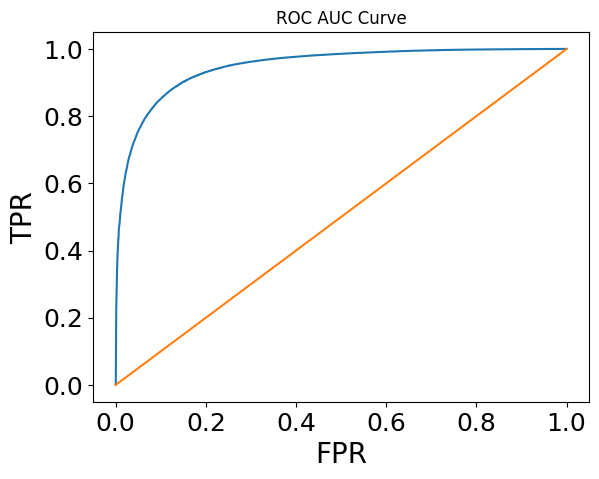

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, f1_score

print('log loss:', log_loss(y_test, y_pred_probs, sample_weight=w_test))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs[:, 1], pos_label=1, sample_weight=w_test)
metrics.auc(fpr, tpr)
print('roc auc:', metrics.auc(fpr, tpr))

optimal_idx = np.argmax(tpr - fpr)
filenames1 = ['ccbar_hits0','bbbar_hits0','electron_hits0','positron_hits0']#,'ccbar_new00'
optimal_threshold = thresholds[optimal_idx]
y_pred_opt = y_pred_probs[:, 1] > optimal_threshold
print('f1 score:', f1_score(y_test, y_pred_opt))
plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.xlabel("FPR", fontsize=20)
plt.ylabel("TPR", fontsize=20)
plt.xticks(fontsize = 18) 
plt.yticks(fontsize = 18) 
plt.title('ROC AUC Curve')

In [ ]:
pred_baseline = np.ones_like(y_test) * y_test.mean()
print("baseline auc:", roc_auc_score(y_test, pred_baseline))
print("baseline log_loss:", log_loss(y_test, pred_baseline))

baseline auc: 0.5
baseline log_loss: 0.1587396479322111


In [ ]:
i = 100000
print(round(tpr[i],3),round(fpr[i]/tpr[i],4))
print(thresholds[i],fpr[i],tpr[i])
#print((fpr[i]/tpr[i]*data1.shape[0]/data2.shape[0]/10)**-1,(fpr[i]/1.*data1.shape[0]/data2.shape[0]/10)**-1)

0.842 0.1095
0.9067761581924021 0.09215196069861362 0.8416915491324178


In [ ]:
print(sum(predicted),len(predicted))

1505016 1540171


In [ ]:
kek_data = all_test
kek_data = kek_data.drop(columns = ['IsTrue0'])
kek_data = kek_data.drop(columns = ['sdphi0','sdphi1','sdphi2','sdphi3'])
kek_data = kek_data.drop(columns = ['Centrality','Pt','Ecore'])
kek_data = kek_data.drop(columns = ['px'])
proba_loc = clf.predict_proba(kek_data)
print(proba_loc[0][1])

0.9239909074605007


In [ ]:
import ROOT as root
outfile = root.TFile.Open("output/BDT_Hits_test1.root", "recreate")
e_pt_hist_AI = root.TH2D("e_pt_hist_AI", "e_pt_hist_AI", 50, 0, 5, 10, 0, 100)
h_pt_hist_AI = root.TH2D("h_pt_hist_AI", "h_pt_hist_AI", 50, 0, 5, 10, 0, 100)
e_pt_hist_SC = root.TH2D("e_pt_hist_SC", "e_pt_hist_SC", 50, 0, 5, 10, 0, 100)
h_pt_hist_SC = root.TH2D("h_pt_hist_SC", "h_pt_hist_SC", 50, 0, 5, 10, 0, 100)
e_pt_hist_NC = root.TH2D("e_pt_hist_NC", "e_pt_hist_NC", 50, 0, 5, 10, 0, 100)
h_pt_hist_NC = root.TH2D("h_pt_hist_NC", "h_pt_hist_NC", 50, 0, 5, 10, 0, 100)

In [ ]:
mycute,mycuth, AIcute, AIcuth = 0.1, 0.1, 0.1, 0.1
norm_e, norm_h = 0.1, 0.1
data0 = all_test.reset_index()  # make sure indexes pair with number of rows

sigma = 3

counter =-1
centrality_prev, pt_prev, IsTrue0_prev = 0, 0, 0
centrality, pt, IsTrue0 = 0, 0, 0
prob, prob_prev = 0, 0
isTrue_sd, isTrue_sd_prev = 0, 0
puk_loc, puk_prev = 0, 0
for index, row in data0.iterrows():
    counter+=1
    if counter>400000: break
    sdphi0, sdphi1, sdphi2, sdphi3 = row['sdphi0'], row['sdphi1'], row['sdphi2'], row['sdphi3'] 
    sdthe0, sdthe1, sdthe2, sdthe3 = row['sdthe0'], row['sdthe1'], row['sdthe2'], row['sdthe3'] 
    centralityloc, ptloc, IsTrue0loc = row['Centrality'], row['Pt'], row['IsTrue0']
    ptloc = row['px']

    if ptloc<0.4 or centralityloc<0: continue

    if abs(ptloc -  pt_prev) < 1e-6: 
        cont = 0
        puk_prev = 1
        if proba_loc[counter][1] > prob_prev:
            prob_prev = proba_loc[counter][1]
            IsTrue0_prev = IsTrue0loc
        isTrue_sd_prev = IsTrue0loc
    else: 
        isTrue_sd = isTrue_sd_prev
        isTrue_sd_prev = IsTrue0loc
        pt = pt_prev
        pt_prev = ptloc
        centrality = centrality_prev
        centrality_prev = centralityloc
        prob = prob_prev
        prob_prev = proba_loc[counter][1]
        IsTrue0 = IsTrue0_prev
        IsTrue0_prev = IsTrue0loc
        cont = 1
        puk = puk_prev
        puk_prev = 0

    if not cont: continue

    if True: e_pt_hist_NC.Fill(pt,centrality)
    else:    h_pt_hist_NC.Fill(pt,centrality)
    if ( abs(sdphi0) < sigma and abs(sdthe0) < sigma and abs(sdphi1) < sigma and abs(sdthe1) < sigma ) and ( ( abs(sdphi2) < sigma and abs(sdthe2) < sigma ) or ( abs(sdphi3) < sigma and abs(sdthe3) < sigma ) ):
        if isTrue_sd: 
            mycute+=1
            e_pt_hist_SC.Fill(pt,centrality)
        else: 
            mycuth+=1+hadron_weight
            h_pt_hist_SC.Fill(pt,centrality)
    if prob>thresholds[i]: 
        if IsTrue0: 
            AIcute+=1
            e_pt_hist_AI.Fill(pt,centrality)
        else: 
            AIcuth+=1+hadron_weight
            h_pt_hist_AI.Fill(pt,centrality)
    if IsTrue0: norm_e+=1
    else: norm_h+=1+hadron_weight
    #if counter<10: 
    #    print(proba_loc[counter],answer(centrality,pt,ep,n0,disp,chi2,npe0,prob))
        #print(centrality, pt, ep, n0, disp, chi2, npe0, prob, phi0 )

In [ ]:
print(norm_e, norm_h,round(mycute/norm_e,3),round(mycuth/norm_h,3), round(AIcute/norm_e,3), round(AIcuth/norm_h,3), round(AIcuth/AIcute/norm_h*norm_e,3),round(fpr[i]/tpr[i],3))

270544.1 11252.1 0.921 1.8 0.895 0.174 0.194 0.109


In [ ]:
print(round(AIcute/mycute/(AIcuth/mycuth),3),round(AIcute/mycute,3),round(AIcuth/mycuth,3), round(30*AIcute/norm_e/AIcuth*norm_h))

10.067 0.971 0.096 155


In [ ]:
%run input/Format.ipynb
%jsroot on

/home/yoren/.local/lib/python3.10/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


In [ ]:
c1 = root.TCanvas("c1","c1",1400,2500)
c1.Divide(2,5)
part_names_legend= [ "prompt e^{-} " , "#gamma#rightarrow e^{-} "]
centralities_legend = ["0-20%","20-40%","40-60%","60-80%","80-93%"]
legends = []
for icentr in range(5):

    c1.cd(1+2*icentr)
    root.gPad.SetLogy()
    e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}").SetLineWidth(8)
    e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}").SetLineWidth(4)
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}").SetLineWidth(2)
    e_pt_hist_NC.SetLineColor(4)
    e_pt_hist_SC.SetLineColor(2)
    e_pt_hist_AI.SetLineColor(1)
    proj = e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    proj.SetMinimum(2)
    Format_Hist_total(proj, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    proj.Draw()
    e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2).Draw("same")
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.65,0.65,0.95,0.95,part_names_legend[0]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2),"std","l")
    legends[-1].AddEntry(e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()

    c1.cd(2+2*icentr)
    root.gPad.SetLogy()
    h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}").SetLineWidth(8)
    h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}").SetLineWidth(4)
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}").SetLineWidth(2)
    h_pt_hist_NC.SetLineColor(4)
    h_pt_hist_SC.SetLineColor(2)
    h_pt_hist_AI.SetLineColor(1)
    projh = h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    Format_Hist_total(projh, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    projh.SetMinimum(2)
    proj.Draw()
    h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2).Draw("same")
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.7,0.65,0.95,0.95,part_names_legend[1]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2),"std","l")
    legends[-1].AddEntry(h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()
c1.Draw()
print(h_pt_hist_NC.GetBinContent(10,1),e_pt_hist_NC.GetBinContent(10,1))
c1.SaveAs("output/kek.png")

0.0 1939.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file output/kek.png has been created


In [ ]:
if False:
    e_pt_hist_AI.Write()
    h_pt_hist_AI.Write()
    e_pt_hist_SC.Write()
    h_pt_hist_SC.Write()
    e_pt_hist_NC.Write()
    h_pt_hist_NC.Write()
    outfile.Close()

In [ ]:
import pickle
with open('output/bdt_hit.pkl','wb') as f:
    pickle.dump(clf,f)

print(clf.predict(kek_data[0:10]))

[1 1 1 1 1 1 1 1 1 1]


In [ ]:
import pickle
# load
with open('output/bdt_hit.pkl', 'rb') as f:
    clf2 = pickle.load(f)
print(clf2.predict(kek_data[0:10]))

[1 1 1 1 1 1 1 1 1 1]


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.978353 to fit



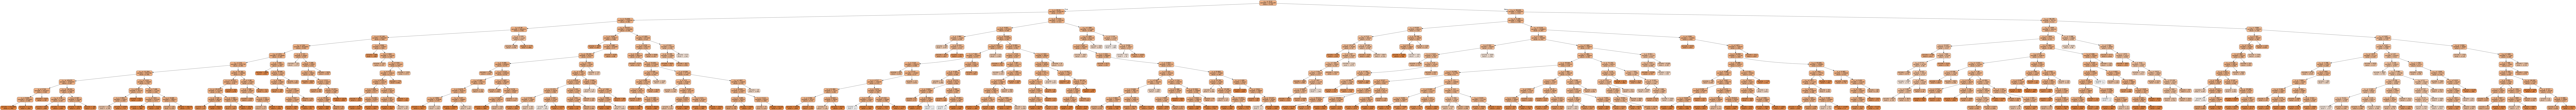

In [ ]:
sub_tree_42 = clf2.best_estimator_[0, 0]
from sklearn.tree import export_graphviz, export_text
from sklearn.tree import _tree
# Visualization
# Install graphviz: https://www.graphviz.org/download/
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)

graph = graph_from_dot_data(dot_data)
png = graph.create_png()
# Save (optional)
from pathlib import Path
Path('output/out.png').write_bytes(png)
# Display
Image(png)

In [ ]:
clf2.predict(kek_data[0:100])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
clf2.predict_proba(kek_data[0:100])

array([[0.07600909, 0.92399091],
       [0.05816762, 0.94183238],
       [0.06634378, 0.93365622],
       [0.04499493, 0.95500507],
       [0.04499493, 0.95500507],
       [0.05447494, 0.94552506],
       [0.0449324 , 0.9550676 ],
       [0.05664793, 0.94335207],
       [0.04570611, 0.95429389],
       [0.04781227, 0.95218773],
       [0.08047775, 0.91952225],
       [0.04499493, 0.95500507],
       [0.04499493, 0.95500507],
       [0.04519661, 0.95480339],
       [0.04519661, 0.95480339],
       [0.04972668, 0.95027332],
       [0.07230734, 0.92769266],
       [0.06793564, 0.93206436],
       [0.04536024, 0.95463976],
       [0.10739249, 0.89260751],
       [0.05782364, 0.94217636],
       [0.04513825, 0.95486175],
       [0.04513825, 0.95486175],
       [0.05087757, 0.94912243],
       [0.04939764, 0.95060236],
       [0.05467219, 0.94532781],
       [0.04519661, 0.95480339],
       [0.07898986, 0.92101014],
       [0.04481568, 0.95518432],
       [0.08501763, 0.91498237],
       [0.

In [ ]:
print( clf2.best_params_)

{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_split': 0.001, 'n_estimators': 12}


In [ ]:
clf2.best_estimator_.predict_proba(kek_data[9:20])

array([[0.04781227, 0.95218773],
       [0.08047775, 0.91952225],
       [0.04499493, 0.95500507],
       [0.04499493, 0.95500507],
       [0.04519661, 0.95480339],
       [0.04519661, 0.95480339],
       [0.04972668, 0.95027332],
       [0.07230734, 0.92769266],
       [0.06793564, 0.93206436],
       [0.04536024, 0.95463976],
       [0.10739249, 0.89260751]])

In [ ]:
y = clf2.best_estimator_[0, 0].predict(kek_data[9:19].values.tolist())*0
#y = gb_clf.decision_function(kek_data[9:20])

rate = clf2.best_params_['learning_rate']
print(rate)
for i in range(0,1):
    sub_tree = clf2.best_estimator_[i, 0]
    y += rate*sub_tree.predict(kek_data[9:19].values.tolist())
print(y)
print(gb_clf.decision_function(kek_data[9:20]))
z=y
for i in range(len(z)): 
    z[i] = 1./(1+np.exp(-z[i]))
print(z)

0.2
[0.39845808 0.36984357 0.39845808 0.39845808 0.39845808 0.39845808
 0.3824884  0.37858373 0.36247556 0.39845808]
[2.97363033 2.8283074  2.97363033 2.97363033 2.97363033 2.97363033
 2.90499201 2.65302447 2.73463299 2.97363033 2.43838142]
[0.59831714 0.59142118 0.59831714 0.59831714 0.59831714 0.59831714
 0.59447313 0.59353147 0.58963957 0.59831714]


In [ ]:
best_gbc = clf2.best_estimator_

In [ ]:
n_estim = best_gbc.n_estimators

In [ ]:
learning_rate = best_gbc.learning_rate
print(clf2.decision_function(kek_data[9:19]))
arr = clf2.decision_function(kek_data[9:19])
print(1./(1.+np.exp(-arr)))
#tree_scores = [best_gbc.estimators_[i, 0].decision_function(kek_data[9:19].values.tolist()) for i in range(10)]
print(learning_rate)

[2.99147993 2.43587352 3.05516676 3.05516676 3.05048343 3.05048343
 2.95020795 2.55177488 2.6188411  3.04669804]
[0.95218773 0.91952225 0.95500507 0.95500507 0.95480339 0.95480339
 0.95027332 0.92769266 0.93206436 0.95463976]
0.2


In [ ]:
log_odds_predictions = []
for tree in clf2.best_estimator_:
    # For each tree, get the predicted values for each sample
    leaf_indices = tree[0].apply(kek_data[9:19].values.tolist())  # Get the leaf indices for the training data
    leaf_values = tree[0].tree_.value  # Get the values at each leaf

    # Average the values for each leaf to interpret them as log odds
    predicted_log_odds = [leaf_values[leaf_indices[i]].mean() for i in range(len(kek_data[9:19]))]
    log_odds_predictions.append(predicted_log_odds)

In [ ]:
print(log_odds_predictions)

[[1.9922903891767716, 1.8492178493236169, 1.9922903891767716, 1.9922903891767716, 1.9922903891767716, 1.9922903891767716, 1.9124419995216455, 1.892918672969033, 1.8123778207170864, 1.9922903891767716], [1.6623802492114952, 1.578582947087458, 1.6623802492114952, 1.6623802492114952, 1.6623802492114952, 1.6623802492114952, 1.638741781980612, 1.595224796710919, 1.5719705523620442, 1.6623802492114952], [1.4359198629672854, 1.3981847538443524, 1.4738913562576452, 1.4738913562576452, 1.4738913562576452, 1.4738913562576452, 1.4372321827382173, 1.0573437304214206, 1.4015948118357768, 1.4738913562576452], [1.3390928207046384, 1.1664450712469039, 1.3549836748793644, 1.3549836748793644, 1.3373204144607846, 1.3373204144607846, 1.3282922699117015, 0.9244426137781021, 1.3150659153130926, 1.3183934878303625], [1.2633658153561755, 1.090629152139225, 1.2633658153561755, 1.2633658153561755, 1.2560258931634112, 1.2560258931634112, 1.2633658153561755, 1.2100990815345294, 0.889766361078007, 1.25602589316341

In [ ]:
rate = clf2.best_params_['learning_rate']
myarr = [log_odds_predictions[i][0] for i in range(n_estim)]
print(rate,rate*sum(myarr))
print(clf2.decision_function(kek_data[9:19]))

0.2 2.9914799304717934
[2.99147993 2.43587352 3.05516676 3.05516676 3.05048343 3.05048343
 2.95020795 2.55177488 2.6188411  3.04669804]


In [ ]:
print(best_gbc.estimators_.shape[0])
print(best_gbc.estimators_.shape[1])
y = []
for i in range(10):
    y0=[]
    for j in range(n_estim):
        sub_tree = clf2.best_estimator_[j, 0]
        y0.append(sub_tree.predict(kek_data[9+i:10+i].values.tolist())[0])
    y.append(y0)
print(y)

12
1
[[1.9922903891767716, 1.6623802492114952, 1.4359198629672854, 1.3390928207046384, 1.2633658153561755, 1.1603539260388487, 1.1513096715614046, 1.1105453309617155, 1.0689078033296966, 1.0338095597275483, 0.7644343105733018, 0.9749899127500851], [1.8492178493236169, 1.578582947087458, 1.3981847538443524, 1.1664450712469039, 1.090629152139225, 1.0753985895440132, 0.36372600840314, 0.6058274103667244, 0.9329725663052951, 0.4577387114014869, 0.6796670513078307, 0.9809774911752672], [1.9922903891767716, 1.6623802492114952, 1.4738913562576452, 1.3549836748793644, 1.2633658153561755, 1.1959054650749226, 1.1513096715614046, 1.1105453309617155, 1.0689078033296966, 1.0338095597275483, 0.9874669848177404, 0.9809774911752672], [1.9922903891767716, 1.6623802492114952, 1.4738913562576452, 1.3549836748793644, 1.2633658153561755, 1.1959054650749226, 1.1513096715614046, 1.1105453309617155, 1.0689078033296966, 1.0338095597275483, 0.9874669848177404, 0.9809774911752672], [1.9922903891767716, 1.6623802

In [ ]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if ( "
        
        for p in path[:-1]:
            if rule != "if ( ":
                rule += " && "
            rule += str(p)
        rule += " ) "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [ ]:
import numpy as np
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if  "
        
        for p in path[:-1]:
            if rule != "if  ":
                rule += " if "
            rule += str(p)
        rule += "  "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [ ]:
column_headers = list(kek_data.columns.values)
print(column_headers)
print(len(column_headers))

['reconpt', 'sdthe0', 'SecondHitPhiR0', 'SecondHitTheR0', 'SecondHitPhiR01', 'SecondHitTheR01', 'sdthe1', 'SecondHitPhiR1', 'SecondHitTheR1', 'SecondHitPhiR11', 'SecondHitTheR11', 'sdthe2', 'SecondHitPhiR2', 'SecondHitTheR2', 'SecondHitPhiR21', 'SecondHitTheR21', 'sdthe3', 'SecondHitPhiR3', 'SecondHitTheR3', 'SecondHitPhiR31', 'SecondHitTheR31']
21


In [ ]:
#print(f"double mytree{list(kek_data.columns)}")
print('{')
for iestim in range(n_estim):
    print(f"    if (iestim == {iestim})")
    print('    {')
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
    print('    }')
print ('    return -9999;')
print('};')

{
    if (iestim == 0)
    {
        if  (x[17] <= -6.240445137023926) if (x[5] <= -65.8104019165039) if (x[7] <= -21.655681610107422) if (x[0] <= 0.35976940393447876) if (x[19] <= -37.19524002075195) if (x[11] <= 2.939516067504883) if (x[16] <= 2.673858404159546) if (x[11] <= 2.0098886489868164) if (x[12] <= -11.25424337387085) if (x[17] <= -45.67503356933594) if (x[6] <= 3.7234251499176025) if (x[1] <= 3.659401774406433)   return 1.9922903891767716;  // | based on 4,321,860 samples
        if  (x[17] <= -6.240445137023926) if (x[5] <= -65.8104019165039) if (x[7] > -21.655681610107422) if (x[15] <= -63.87058067321777) if (x[1] > -3.0910288095474243) if (x[1] <= 3.4677000045776367) if (x[19] <= -50.29070472717285) if (x[6] > -3.365244507789612) if (x[13] <= -5.724036455154419) if (x[16] <= 3.081455945968628) if (x[2] <= 14.878760814666748) if (x[11] <= 3.9058228731155396)   return 1.9124419995216455;  // | based on 413,524 samples
        if  (x[17] <= -6.240445137023926) if (x[5] <= -

In [ ]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " : "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f"  # | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [ ]:
print(f"def mytree( iestim,  x ) :")
for iestim in range(n_estim):
    print(f"    if iestim == {iestim}:")
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
print ('    return -9999')

def mytree( iestim,  x ) :
    if iestim == 0:
        if (x[17] <= -6.240445137023926) and (x[5] <= -65.8104019165039) and (x[7] <= -21.655681610107422) and (x[0] <= 0.35976940393447876) and (x[19] <= -37.19524002075195) and (x[11] <= 2.939516067504883) and (x[16] <= 2.673858404159546) and (x[11] <= 2.0098886489868164) and (x[12] <= -11.25424337387085) and (x[17] <= -45.67503356933594) and (x[6] <= 3.7234251499176025) and (x[1] <= 3.659401774406433) :  return 1.9922903891767716  # | based on 4,321,860 samples
        if (x[17] <= -6.240445137023926) and (x[5] <= -65.8104019165039) and (x[7] > -21.655681610107422) and (x[15] <= -63.87058067321777) and (x[1] > -3.0910288095474243) and (x[1] <= 3.4677000045776367) and (x[19] <= -50.29070472717285) and (x[6] > -3.365244507789612) and (x[13] <= -5.724036455154419) and (x[16] <= 3.081455945968628) and (x[2] <= 14.878760814666748) and (x[11] <= 3.9058228731155396) :  return 1.9124419995216455  # | based on 413,524 samples
        if (x[17] <

In [ ]:
def mytree(x,y):
    return 0

In [ ]:
def mygradboost (x, lerning_rate = 0.2):
    prob = 0
    for i in range (n_estim):
        prob+=lerning_rate*mytree(i, x)
    return 1. / ( 1. + np.exp( - prob ) )


In [ ]:
def mybdt(x, prob):
    if mygradboost(x)>prob: return 1
    return  

In [ ]:
iestim = 0
sub_tree = clf2.best_estimator_[iestim, 0]
y = sub_tree.predict(kek_data[9:19].values.tolist())
print(y)

myf = [mytree(iestim, kek_data[9+i:10+i].values.tolist()[0]) for i in range(n_estim)]
print(myf)

[1.99229039 1.84921785 1.99229039 1.99229039 1.99229039 1.99229039
 1.912442   1.89291867 1.81237782 1.99229039]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
input_x = [ kek_data[9:19].values.tolist()[0][i] for i in range(len(kek_data[9:19].values.tolist()[0])) ]
print(input_x)

[-0.10638698935508728, 0.8135226964950562, 40.127349853515625, 12.455085754394531, -99.0, -99.0, 0.1917729675769806, -99.0, -99.0, -99.0, -99.0, 0.18125797808170319, -99.0, -99.0, -99.0, -99.0, -1.4708316326141357, -99.0, -99.0, -99.0, -99.0]


In [ ]:
iestim = 9
sub_tree = clf2.best_estimator_
y = sub_tree.predict_proba(kek_data[9:19].values.tolist())
y = [y[i][1] for i in range(len(y))]
print(y)

myf = [mygradboost(kek_data[9+i:10+i].values.tolist()[0]) for i in range(10)]
print(myf)

[0.9521877309496958, 0.9195222520311779, 0.9550050668070886, 0.9550050668070886, 0.9548033927785365, 0.9548033927785365, 0.9502733156434346, 0.9276926621715101, 0.9320643612061116, 0.9546397572168639]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


/home/yoren/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import ROOT as root
outfile = root.TFile.Open("output/BDT_Hits_test1.root", "recreate")
e_pt_hist_AI = root.TH2D("e_pt_hist_AI", "e_pt_hist_AI", 50, 0, 5, 10, 0, 100)
h_pt_hist_AI = root.TH2D("h_pt_hist_AI", "h_pt_hist_AI", 50, 0, 5, 10, 0, 100)
e_pt_hist_SC = root.TH2D("e_pt_hist_SC", "e_pt_hist_SC", 50, 0, 5, 10, 0, 100)
h_pt_hist_SC = root.TH2D("h_pt_hist_SC", "h_pt_hist_SC", 50, 0, 5, 10, 0, 100)
e_pt_hist_NC = root.TH2D("e_pt_hist_NC", "e_pt_hist_NC", 50, 0, 5, 10, 0, 100)
h_pt_hist_NC = root.TH2D("h_pt_hist_NC", "h_pt_hist_NC", 50, 0, 5, 10, 0, 100)

In [ ]:
column_headers = list(kek_data.columns.values)
print(column_headers)
print(len(column_headers))

['reconpt', 'sdthe0', 'SecondHitPhiR0', 'SecondHitTheR0', 'SecondHitPhiR01', 'SecondHitTheR01', 'sdthe1', 'SecondHitPhiR1', 'SecondHitTheR1', 'SecondHitPhiR11', 'SecondHitTheR11', 'sdthe2', 'SecondHitPhiR2', 'SecondHitTheR2', 'SecondHitPhiR21', 'SecondHitTheR21', 'sdthe3', 'SecondHitPhiR3', 'SecondHitTheR3', 'SecondHitPhiR31', 'SecondHitTheR31']
21
